## Calculation of Coverage

In [2]:
#Create  structure if necessary
import os
from src.utils.read_utils import save_yaml
input_dir = '/ds/images/AI4EO/multi/landcovernet/ref_landcovernet_sa_v1/ref_landcovernet_sa_v1_source_sentinel_2/'

patches_ids = list(set(['_'.join(patch.split('_')[7:9]) for patch in os.listdir(input_dir) if patch != 'collection.json']))
dataset_structure =  dict.fromkeys(patches_ids, {})
print(patches_ids)
for patch_id in patches_ids:
    print(patch_id,'___')
    cloud_paths = [os.path.join(input_dir,ts,'SCL.tif') for ts in os.listdir(input_dir) if patch_id in ts]
    dataset_structure[patch_id] = {'scl_mask_paths': cloud_paths, 'boundary_paths': None}
print(f"In total {len(patches_ids)} patches were scanned ")

save_yaml(yaml_path='./coverage/landcovernet_sa/landcovernet_structure_southamerica.yaml', data = dataset_structure)


In [1]:
#dataset_structure_path = './coverage/landcovernet_sa/landcovernet_structure_southamerica.yaml'
dataset_structure_path = './coverage/landcovernet_au/landcovernet_structure_australia.yaml'

> By clouds (removing classes 3,8, and 9)

In [ ]:
from src.coverage_analysis.dataset_coverage_analysis import analyze_dataset
from src.coverage_analysis.SCL import IND_ALL_,IND_CLOUDS_, remove_labels

idx_targets = remove_labels(IND_ALL_, IND_CLOUDS_) #index to be selected (all except 3, 8 and 9)
min_spatial_coverage=70
min_temporal_coverage=70      
output_dir = "./coverage/landcovernet_au/"
num_process=-1
results = analyze_dataset(dataset_structure_path = dataset_structure_path, 
                            idx_targets = idx_targets, 
                            min_spatial_coverage = min_spatial_coverage, 
                            min_temporal_coverage = min_temporal_coverage,
                            output_dir=output_dir,
                            num_process=num_process
                            )

## Plots

In [1]:
input_dir = './coverage/'

In [3]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
import pandas as pd
from src.visualization.plots import plot_coverage_order

df_stats_eu = pd.read_csv(f"{input_dir}/landcovernet_eu/assesment_spat_50_temp_50_sel_000102040506071011.csv", index_col=0)
df_stats_au = pd.read_csv(f"{input_dir}/landcovernet_au/assesment_spat_50_temp_50_sel_000102040506071011.csv", index_col=0)
df_stats_sa = pd.read_csv(f"{input_dir}/landcovernet_sa/assesment_spat_50_temp_50_sel_000102040506071011.csv", index_col=0)

df_stats_eu.head()

,num_timesteps,num_timesteps_missing,avg_spatial_coverage,num_timesteps_abovecov,temporal_coverage,assesment_temporal,assesment_spatial
filename,,,,,,,
30SWH_00,71,71,61.908604,45,63.380282,high,high
30SWH_01,144,144,69.344658,102,70.833333,high,high
30SWH_02,71,42,64.263013,45,63.380282,high,high
30SWH_03,71,50,62.431808,46,64.788732,high,high
30SWH_04,71,47,59.777488,44,61.971831,high,high


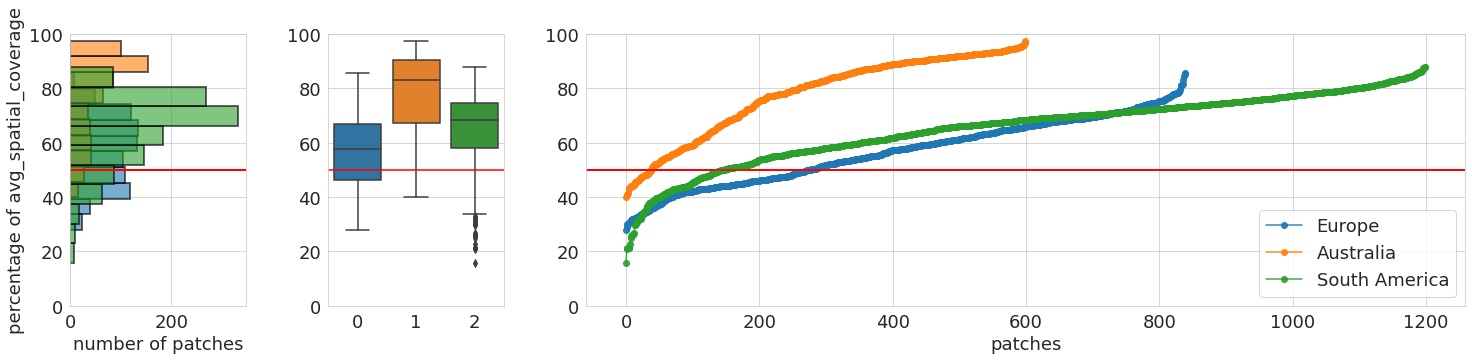

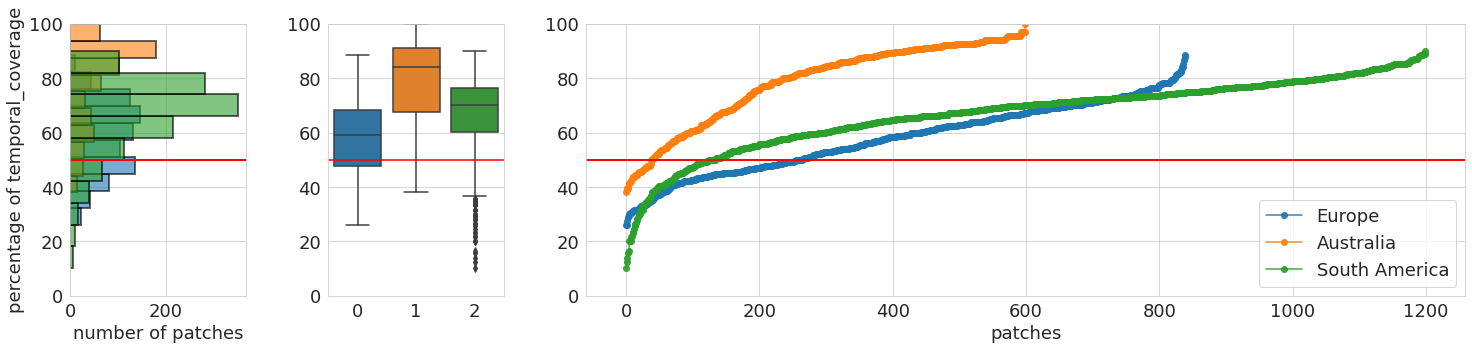

In [4]:
plot_coverage_order([df_stats_eu,df_stats_au,df_stats_sa], ["Europe","Australia", "South America"], 
                    "avg_spatial_coverage", lower_limit=50, lower_limit_show=True)
plt.savefig("imgs/landcovernet_spatial_coverage_50.pdf")
plt.show()

plot_coverage_order([df_stats_eu,df_stats_au,df_stats_sa], ["Europe","Australia", "South America"], 
                    "temporal_coverage", lower_limit=50, lower_limit_show=True)
plt.savefig("imgs/landcovernet_temporal_coverage_50.pdf")
plt.show()

> Categorization

In [14]:
#low coverage fields based on spatial assessment
d_ = df_stats_eu[df_stats_eu["assesment_spatial"] == "low"]
print("In Europe we found ",{"num_low": len(d_), "perc_low":len(d_)/len(df_stats_eu)})

d_ = df_stats_au[df_stats_au["assesment_spatial"] == "low"]
print("In Australia we found ",{"num_low": len(d_), "perc_low":len(d_)/len(df_stats_eu)})

d_ = df_stats_sa[df_stats_sa["assesment_spatial"] == "low"]
print("In South America we found ",{"num_low": len(d_), "perc_low":len(d_)/len(df_stats_eu)})

d_

In Europe we found  {'num_low': 275, 'perc_low': 0.3273809523809524}
In Australia we found  {'num_low': 38, 'perc_low': 0.04523809523809524}
In South America we found  {'num_low': 147, 'perc_low': 0.175}


,num_timesteps,num_timesteps_missing,avg_spatial_coverage,num_timesteps_abovecov,temporal_coverage,assesment_temporal,assesment_spatial
filename,,,,,,,
17NRB_00,57,57,29.908726,17,29.824561,low,low
17NRB_01,65,65,30.795476,16,24.615385,low,low
17NRB_02,57,57,21.148414,7,12.280702,low,low
17NRB_03,59,59,15.816692,6,10.169492,low,low
17NRB_04,60,60,25.072886,12,20.000000,low,low
...,...,...,...,...,...,...,...
22NCK_22,60,60,47.226461,32,53.333333,high,low
22NCK_23,60,60,43.889618,28,46.666667,low,low
22NCK_24,64,64,45.378971,29,45.312500,low,low


In [15]:
#low coverage fields based on temporal assessment
d_ = df_stats_eu[df_stats_eu["assesment_temporal"] == "low"]
print("In Europe we found ",{"num_low": len(d_), "perc_low":len(d_)/len(df_stats_eu)})

d_ = df_stats_au[df_stats_au["assesment_temporal"] == "low"]
print("In Australia we found ",{"num_low": len(d_), "perc_low":len(d_)/len(df_stats_eu)})

d_ = df_stats_sa[df_stats_sa["assesment_temporal"] == "low"]
print("In South America we found ",{"num_low": len(d_), "perc_low":len(d_)/len(df_stats_eu)})
d_

In Europe we found  {'num_low': 255, 'perc_low': 0.30357142857142855}
In Australia we found  {'num_low': 38, 'perc_low': 0.04523809523809524}
In South America we found  {'num_low': 124, 'perc_low': 0.14761904761904762}


,num_timesteps,num_timesteps_missing,avg_spatial_coverage,num_timesteps_abovecov,temporal_coverage,assesment_temporal,assesment_spatial
filename,,,,,,,
17NRB_00,57,57,29.908726,17,29.824561,low,low
17NRB_01,65,65,30.795476,16,24.615385,low,low
17NRB_02,57,57,21.148414,7,12.280702,low,low
17NRB_03,59,59,15.816692,6,10.169492,low,low
17NRB_04,60,60,25.072886,12,20.000000,low,low
...,...,...,...,...,...,...,...
22NCK_23,60,60,43.889618,28,46.666667,low,low
22NCK_24,64,64,45.378971,29,45.312500,low,low
22NCK_28,59,57,41.010349,25,42.372881,low,low
